In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

# (1) Read data

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# (2) Preporation

## (2.1) EDA

## (2.2) Pre-processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### (2.2.2) Encoding

LabelEncoding

In [ ]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [ ]:
mapping = {'Female': 1,
           'Male': 0}

In [ ]:
df['Gender'] = df['Gender'].map(mapping)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


### (2.2.5) Selection (Income)

In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
df = df.drop("CustomerID", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [ ]:
df_inc_sc = df.drop(columns=["Age", "Gender"])
df_inc_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


### Optimal number of clusters

Elbow method

In [ ]:
from sklearn.cluster import KMeans

[181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30227.606513152015, 25011.83934915659, 21818.114588452183]


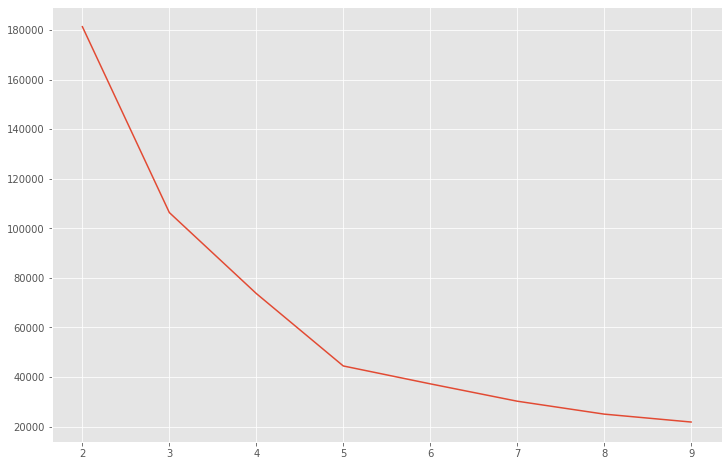

In [ ]:
criteries = []
for k in range(2,10):
  KModel=KMeans(n_clusters=k, random_state=1)
  KModel.fit(df_inc_sc)
  criteries.append(KModel.inertia_)

print(criteries)
plt.plot(range(2,10), criteries)

# (3) Train (K-Means) Income

Income clustering


---


In [ ]:
from sklearn.cluster import KMeans
KModel = KMeans(n_clusters=5)
KModel.fit(df_inc_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = KModel.labels_
print(labels)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 3 4 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 0 1 3 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


# (4) Analysis/Evaluation

In [ ]:
df_inc_sc = df_inc_sc.to_numpy()

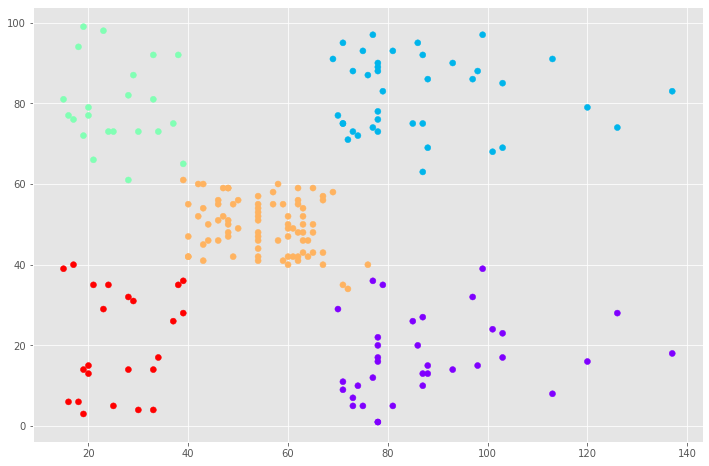

In [ ]:
plt.scatter(df_inc_sc[:,0], df_inc_sc[:,1], c=labels, cmap='rainbow')



---



---


## (2.2) Pre-processing

### (2.2.5) Selection (Age)

In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
df_age = df.drop(columns=["Gender", "Annual Income (k$)"])

### Optimal number of clusters

Elbow method

In [ ]:
from sklearn.cluster import KMeans

[75949.15601023017, 45840.67661610867, 28165.58356662934, 23811.52352472089, 19689.84881221906, 15523.684014328752, 13002.466488382792, 11515.33539021164]


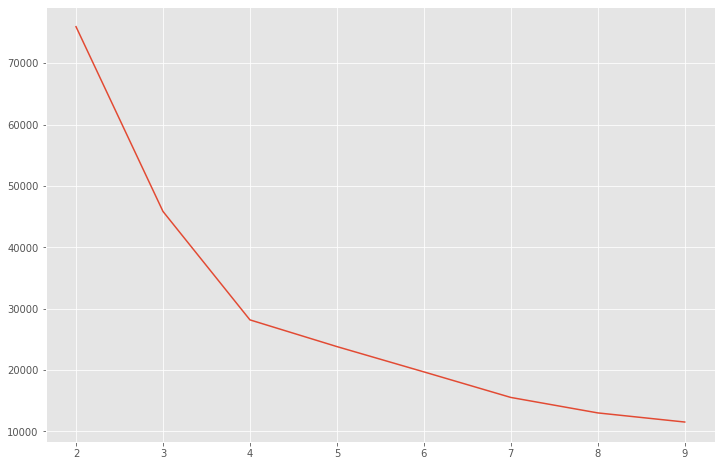

In [ ]:
criteries = []
for k in range(2,10):
  KModel=KMeans(n_clusters=k, random_state=1)
  KModel.fit(df_age)
  criteries.append(KModel.inertia_)

print(criteries)
plt.plot(range(2,10), criteries)

# (3) Train (K-Means) Age

In [ ]:
from sklearn.cluster import KMeans
KModel = KMeans(n_clusters=4)
KModel.fit(df_age)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = KModel.labels_
print(labels)

[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


# (4) Analysis/Evaluation

In [ ]:
df_age = df_age.to_numpy()

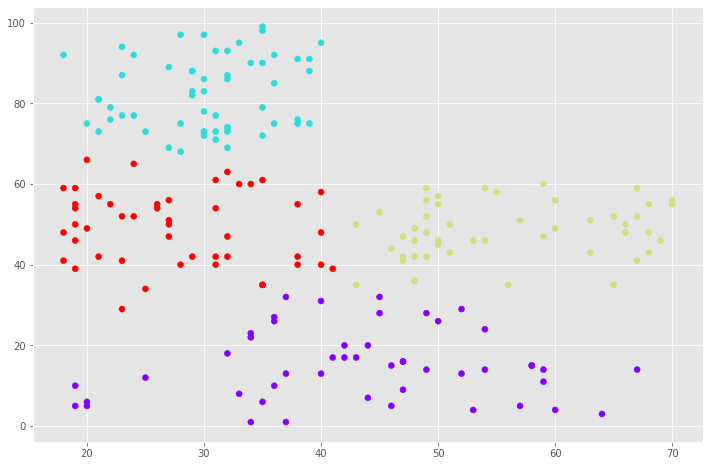

In [ ]:
plt.scatter(df_age[:,0], df_age[:,1], c=labels, cmap='rainbow')